In [1]:
import qiskit
print(qiskit.version.get_version_info())

2.0.2


In [10]:
# useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import QFT
import qiskit_aer

# import basic plot tools
from qiskit.visualization import plot_histogram
from math import pi, sqrt, exp

In [3]:
backend = qiskit_aer.Aer.get_backend('qasm_simulator')
sim = qiskit_aer.Aer.get_backend("aer_simulator")

In [11]:
# Number of qubits
n_qubits = 2
grover_circuit = QuantumCircuit(n_qubits)

# Step 1: Apply Hadamard to all qubits (superposition)
grover_circuit.h(range(n_qubits))

# Step 2: Oracle: flips the sign of |11⟩ (the marked state)
oracle = QuantumCircuit(n_qubits)
oracle.cz(0, 1)  # Apply controlled-Z to flip phase of |11⟩
grover_circuit.compose(oracle, inplace=True)

# Step 3: Diffusion operator (inversion about the mean)
diffuser = QuantumCircuit(n_qubits)
diffuser.h(range(n_qubits))
diffuser.x(range(n_qubits))
diffuser.h(1)
diffuser.cx(0, 1)
diffuser.h(1)
diffuser.x(range(n_qubits))
diffuser.h(range(n_qubits))
grover_circuit.compose(diffuser, inplace=True)

# Step 4: Measurement
grover_circuit.measure_all()

# Visualize the circuit
print(grover_circuit.draw())

        ┌───┐   ┌───┐┌───┐          ┌───┐┌───┐      ░ ┌─┐   
   q_0: ┤ H ├─■─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░─┤M├───
        ├───┤ │ ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ░ └╥┘┌─┐
   q_1: ┤ H ├─■─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░──╫─┤M├
        └───┘   └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░  ║ └╥┘
meas: 2/═══════════════════════════════════════════════╩══╩═
                                                       0  1 


In [12]:
# Step 5: Execute the circuit
circuits = [grover_circuit]
new_circuits = transpile(circuits, backend)
job = backend.run(new_circuits)
result = job.result()

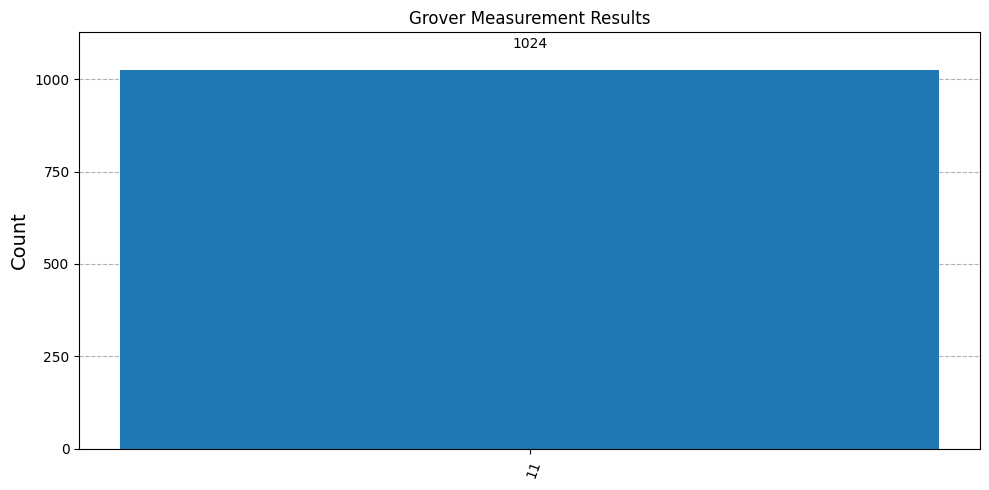

In [13]:
plot_histogram(result.get_counts(grover_circuit), figsize=(10, 5), title='Grover Measurement Results').savefig('Grover_histogram.png')

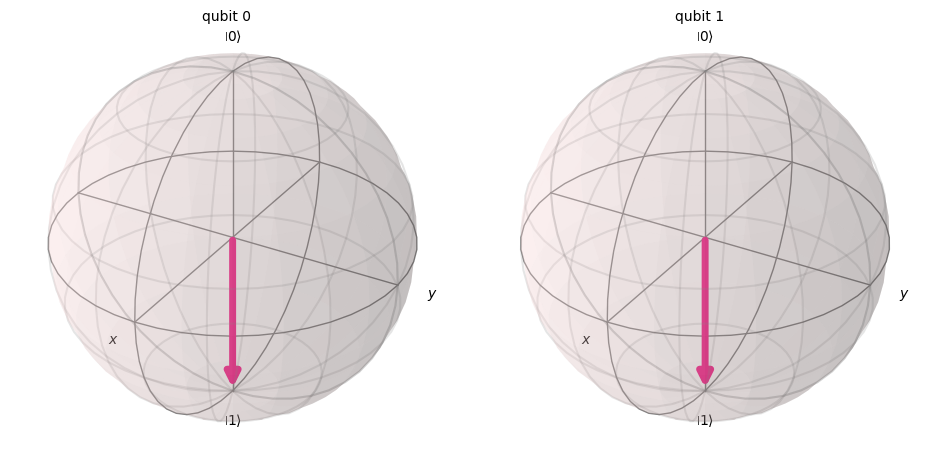

<IPython.core.display.Latex object>

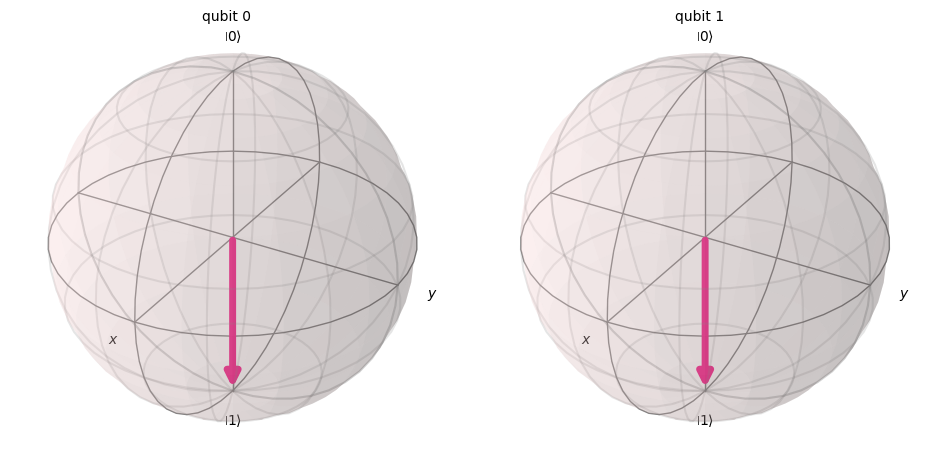

In [14]:
from qiskit.visualization import plot_bloch_multivector
grover_circuit.save_statevector()
statevector_init = sim.run(grover_circuit).result().get_statevector()
display(plot_bloch_multivector(statevector_init))
display(statevector_init.draw('latex'))